In [9]:
import os
import PIL.Image as Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
def load_images_from_folder(folder_path):
  train_images = []
  train_labels = []
  test_images = []
  test_labels = []
  # at the first iteration want it to catch the train data, and then the test ones at the second
  for iteration, subfolder_1 in enumerate(os.listdir(folder_path)): # train, test
    print(f"Loading from {subfolder_1}:")
    subfolder_1_path = os.path.join(folder_path, subfolder_1)
    for label, subfolder_2 in enumerate(os.listdir(subfolder_1_path)): # ants, bees
      print(f"At iteration {iteration} - {subfolder_1}, {subfolder_2}")
      subfolder_2_path = os.path.join(subfolder_1_path, subfolder_2) 
      for file in os.listdir(subfolder_2_path):
        image_path = os.path.join(subfolder_2_path, file)
        try:
          image = Image.open(image_path).convert('RGB').resize((32, 32))
          image = np.array(image)
          if iteration == 0:
            train_images.append(image)
            train_labels.append(label)
          else:
            test_images.append(image)
            test_labels.append(label)
        except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  return (np.array(train_images), np.array(train_labels)), (np.array(test_images), np.array(test_labels))

In [62]:
# load the images data using the built function
image_path = r'C:\Users\Houcine DG\OneDrive\Bureau\Master Data Science\s3\deep learning medical - Afdel\hymenoptera_data'
(train_images, train_labels), (test_images, test_labels) = load_images_from_folder(image_path)

Loading from train:
At iteration 0 - train, ants
At iteration 0 - train, bees
Loading from val:
At iteration 1 - val, ants
At iteration 1 - val, bees


In [104]:
# print data shapes
print(f"train_images shape: {train_images.shape}, train_labels shape: {train_labels.shape}")
print(f"test_images shape: {test_images.shape}, test_labels shape: {test_labels.shape}")

train_images shape: (245, 32, 32, 3), train_labels shape: (245,)
test_images shape: (153, 32, 32, 3), test_labels shape: (153,)


Text(0.5, 1.0, '0')

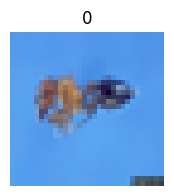

In [110]:
# show the first traing image and its label
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(train_images[0])
plt.title(train_labels[0])

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout

input_shape = (32, 32, 3)
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

c:\Pipeline_development\python312_venv_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
model.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [131]:
model.fit(train_images, train_labels, batch_size=32, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5466 - loss: 12.5092
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4794 - loss: 3.8091
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5825 - loss: 2.1347 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5865 - loss: 1.2107 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6525 - loss: 0.9721 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6744 - loss: 0.6682 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6556 - loss: 0.6863 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6475 - loss: 0.6688 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6850 - loss: 0.5954 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6872 - loss: 0.5884 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6978 - loss: 0.5882 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7356 - los

In [132]:
loss, accuracy = model.evaluate(test_images, test_labels)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6696 - loss: 1.3397  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


(-0.5, 31.5, 31.5, -0.5)

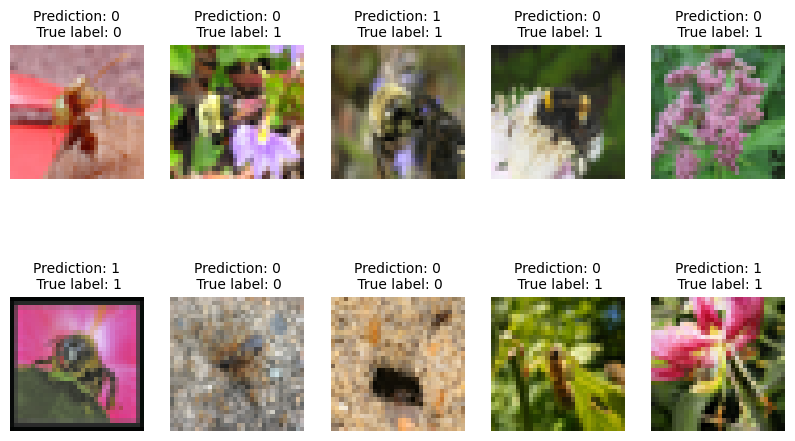

In [202]:
# let's make some predictions
plt.figure(figsize=(10, 6))
for i in range(10):
  rand_index = np.random.randint(len(test_images))
  image_as_batch = test_images[rand_index].reshape(1, 32, 32, 3)
  prediction = [1 if model.predict(image_as_batch) > 0.5 else 0] 
  plt.subplot(2, 5, i + 1)
  plt.imshow(test_images[rand_index])
  plt.title(f"Prediction: {prediction[0]}\n True label: {test_labels[rand_index]}", fontsize=10)
  plt.axis('off')
plt.axis('off')
# plt.tight_layout()

In [215]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(test_images)
predictions = [1 if prediction > 0.5 else 0 for prediction in predictions]
print(classification_report(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))
# it's not actually a perfect model since the data lackage!  

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.53      0.73      0.61        70
           1       0.67      0.46      0.54        83

    accuracy                           0.58       153
   macro avg       0.60      0.59      0.58       153
weighted avg       0.60      0.58      0.58       153

[[51 19]
 [45 38]]
